In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure
#%matplotlib inline

from IPython.display import Image

import re
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

from sklearn.model_selection import cross_val_score, KFold


import scipy.stats
from scipy.stats import chi2


In [3]:
df=pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:

df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'},inplace=True)

In [7]:

df[df == 'Unknown'].count()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0


In [8]:
### Check for 0 values
df[df == 0].count()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,904
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [10]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [11]:
aggdata= df.groupby(['Attrition_Flag'])['CLIENTNUM'].count().to_frame().reset_index()
aggdata

,Attrition_Flag,CLIENTNUM
0,Attrited Customer,1627
1,Existing Customer,8500


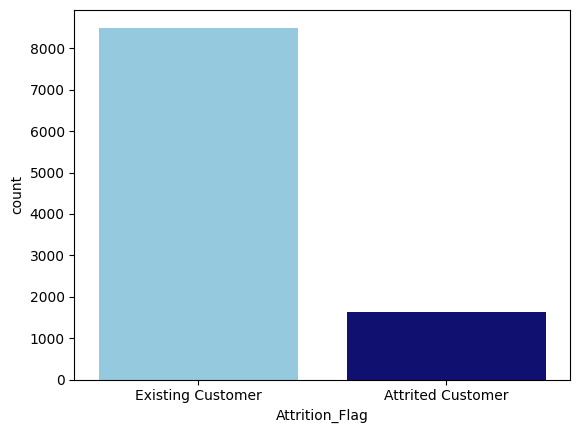

In [12]:
sns.countplot(x='Attrition_Flag', data=df, hue='Attrition_Flag', palette=['skyblue', 'navy'])
plt.show()

In [13]:
df['Attrition_Flag'] = df.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


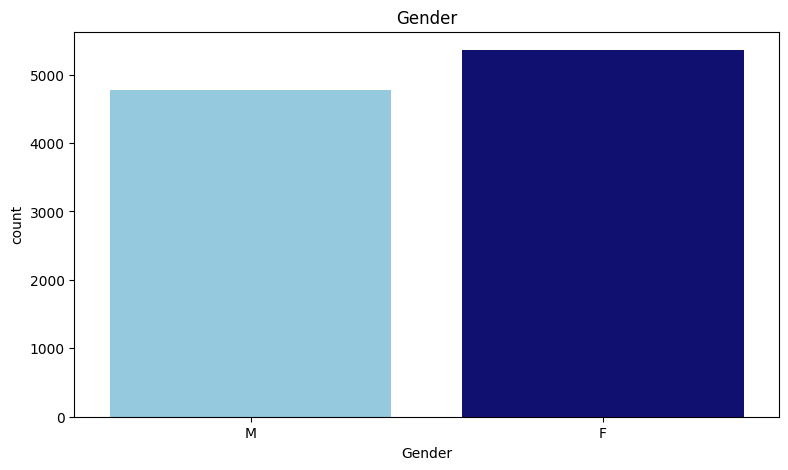

In [14]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', hue = 'Gender', palette = ['skyblue', 'navy'], data = df)
plt.show()

In [15]:
cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")

cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop

Attrition_Flag,Gender,0,1
0,F,0.826428,0.173572
1,M,0.853848,0.146152


In [16]:
### Check if the difference between the two groups is statistically significant

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     13.866
p-value:            0.00019636
degrees of freedom: 1
expected frequencies:
 [[4497.18574109  860.81425891]
 [4002.81425891  766.18574109]]


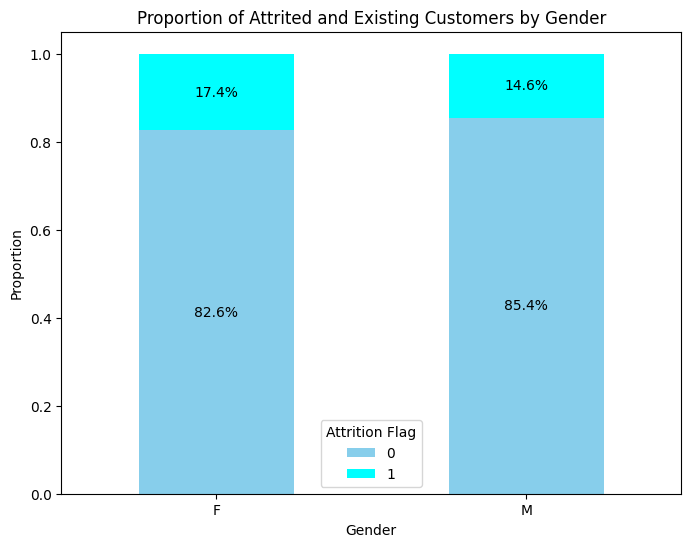

In [17]:
ax = cross_tab_prop.plot(x='Gender', kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'cyan'])
plt.ylabel("Proportion")
plt.title("Proportion of Attrited and Existing Customers by Gender")
plt.xticks(rotation=0)
plt.legend(title='Attrition Flag')

for c in ax.containers:
    labels = [f'{w*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [18]:
fig = px.histogram(df, x='Gender', color='Marital_Status', facet_col='Marital_Status',
                   title='Distribution of Gender by Marital Status', color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(bargap=0.2)
fig.show()

In [19]:
cross_tab = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Marital_Status'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Marital_Status,,
Divorced,0.838235,0.161765
Married,0.848731,0.151269
Single,0.830586,0.169414
Unknown,0.827770,0.172230


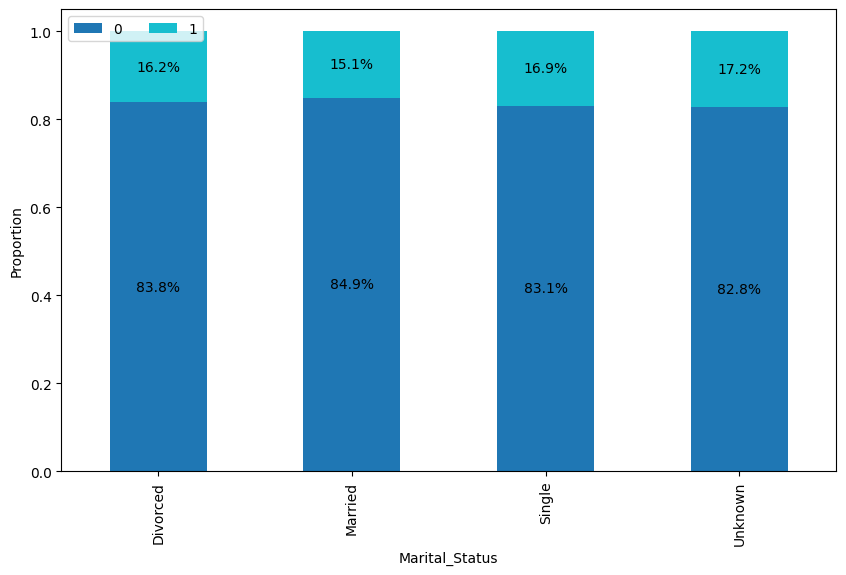

In [20]:
ax = cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Marital_Status")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]

    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [21]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     6.0561
p-value:            0.10891
degrees of freedom: 3
expected frequencies:
 [[ 627.82660215  120.17339785]
 [3933.98834798  753.01165202]
 [3309.51910734  633.48089266]
 [ 628.66594253  120.33405747]]


In [22]:
fig = px.histogram(df, x='Education_Level', color='Education_Level', title='Distribution of Education Level', color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(showlegend=False)
fig.show()

In [23]:
cross_tab = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Education_Level'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Education_Level,,
College,0.847976,0.152024
Doctorate,0.789357,0.210643
Graduate,0.844309,0.155691
High School,0.847988,0.152012
Post-Graduate,0.821705,0.178295
Uneducated,0.840619,0.159381
Unknown,0.831468,0.168532


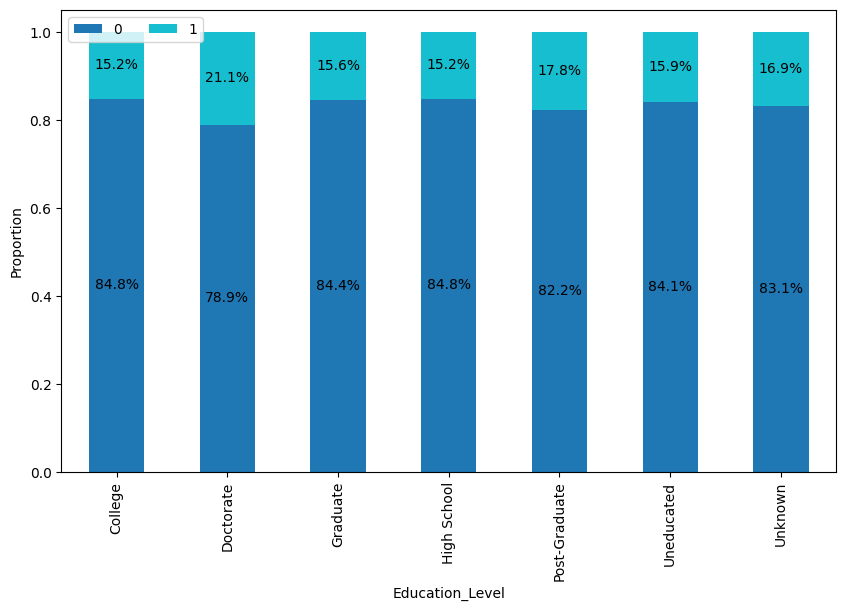

In [24]:
ax = cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education_Level")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]

    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [25]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     12.511
p-value:            0.051489
degrees of freedom: 6
expected frequencies:
 [[ 850.25180211  162.74819789]
 [ 378.54251012   72.45748988]
 [2625.45669991  502.54330009]
 [1689.59217932  323.40782068]
 [ 433.09963464   82.90036536]
 [1248.09914091  238.90085909]
 [1274.95803298  244.04196702]]


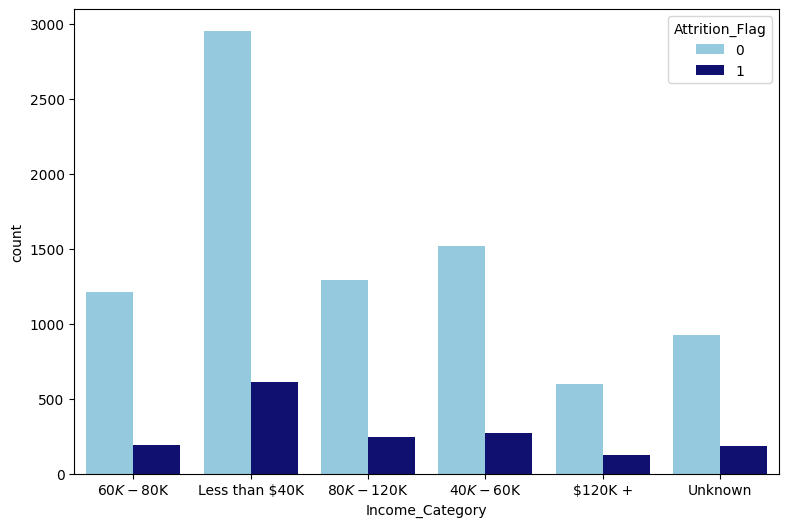

In [26]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = ['skyblue', 'navy'], data = df)
plt.show()

In [27]:
cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Income_Category,,
$120K +,0.826685,0.173315
$40K - $60K,0.848603,0.151397
$60K - $80K,0.865193,0.134807
$80K - $120K,0.842345,0.157655
Less than $40K,0.828138,0.171862
Unknown,0.831835,0.168165


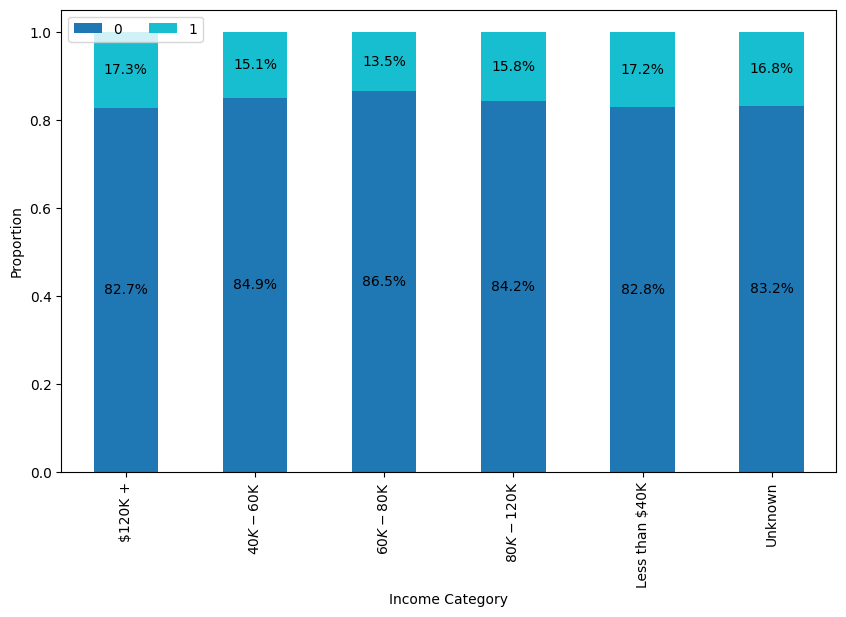

In [28]:
ax = cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]

    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [29]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     12.832
p-value:            0.025002
degrees of freedom: 5
expected frequencies:
 [[ 610.20045423  116.79954577]
 [1502.4192752   287.5807248 ]
 [1176.75520885  225.24479115]
 [1288.38747902  246.61252098]
 [2988.89108324  572.10891676]
 [ 933.34649946  178.65350054]]


/tmp/ipython-input-2167731410.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




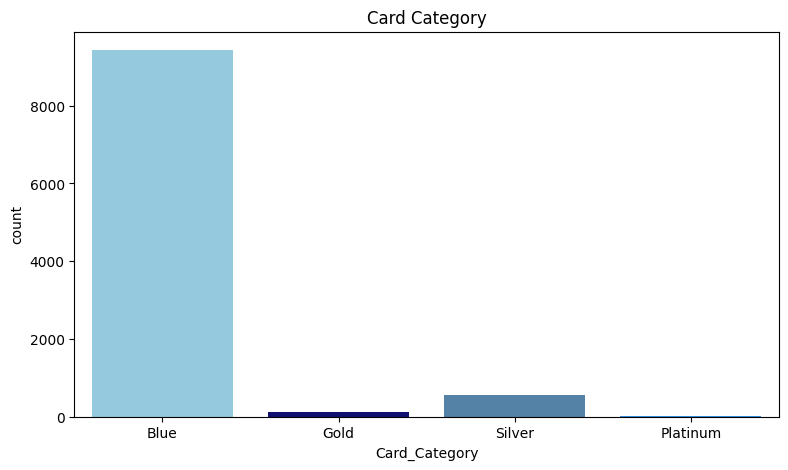

In [30]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Card Category')
sns.countplot(x = 'Card_Category', palette = ['skyblue', 'navy', 'steelblue', 'dodgerblue'], data = df)
plt.show()

In [31]:
cross_tab = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Card_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,0,1
Card_Category,,
Blue,0.839021,0.160979
Gold,0.818966,0.181034
Platinum,0.750000,0.250000
Silver,0.852252,0.147748


In [32]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     2.2342
p-value:            0.52524
degrees of freedom: 3
expected frequencies:
 [[7.92001580e+03 1.51598420e+03]
 [9.73634838e+01 1.86365162e+01]
 [1.67868075e+01 3.21319246e+00]
 [4.65833909e+02 8.91660906e+01]]


#Numerical Variables

/tmp/ipython-input-607023527.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



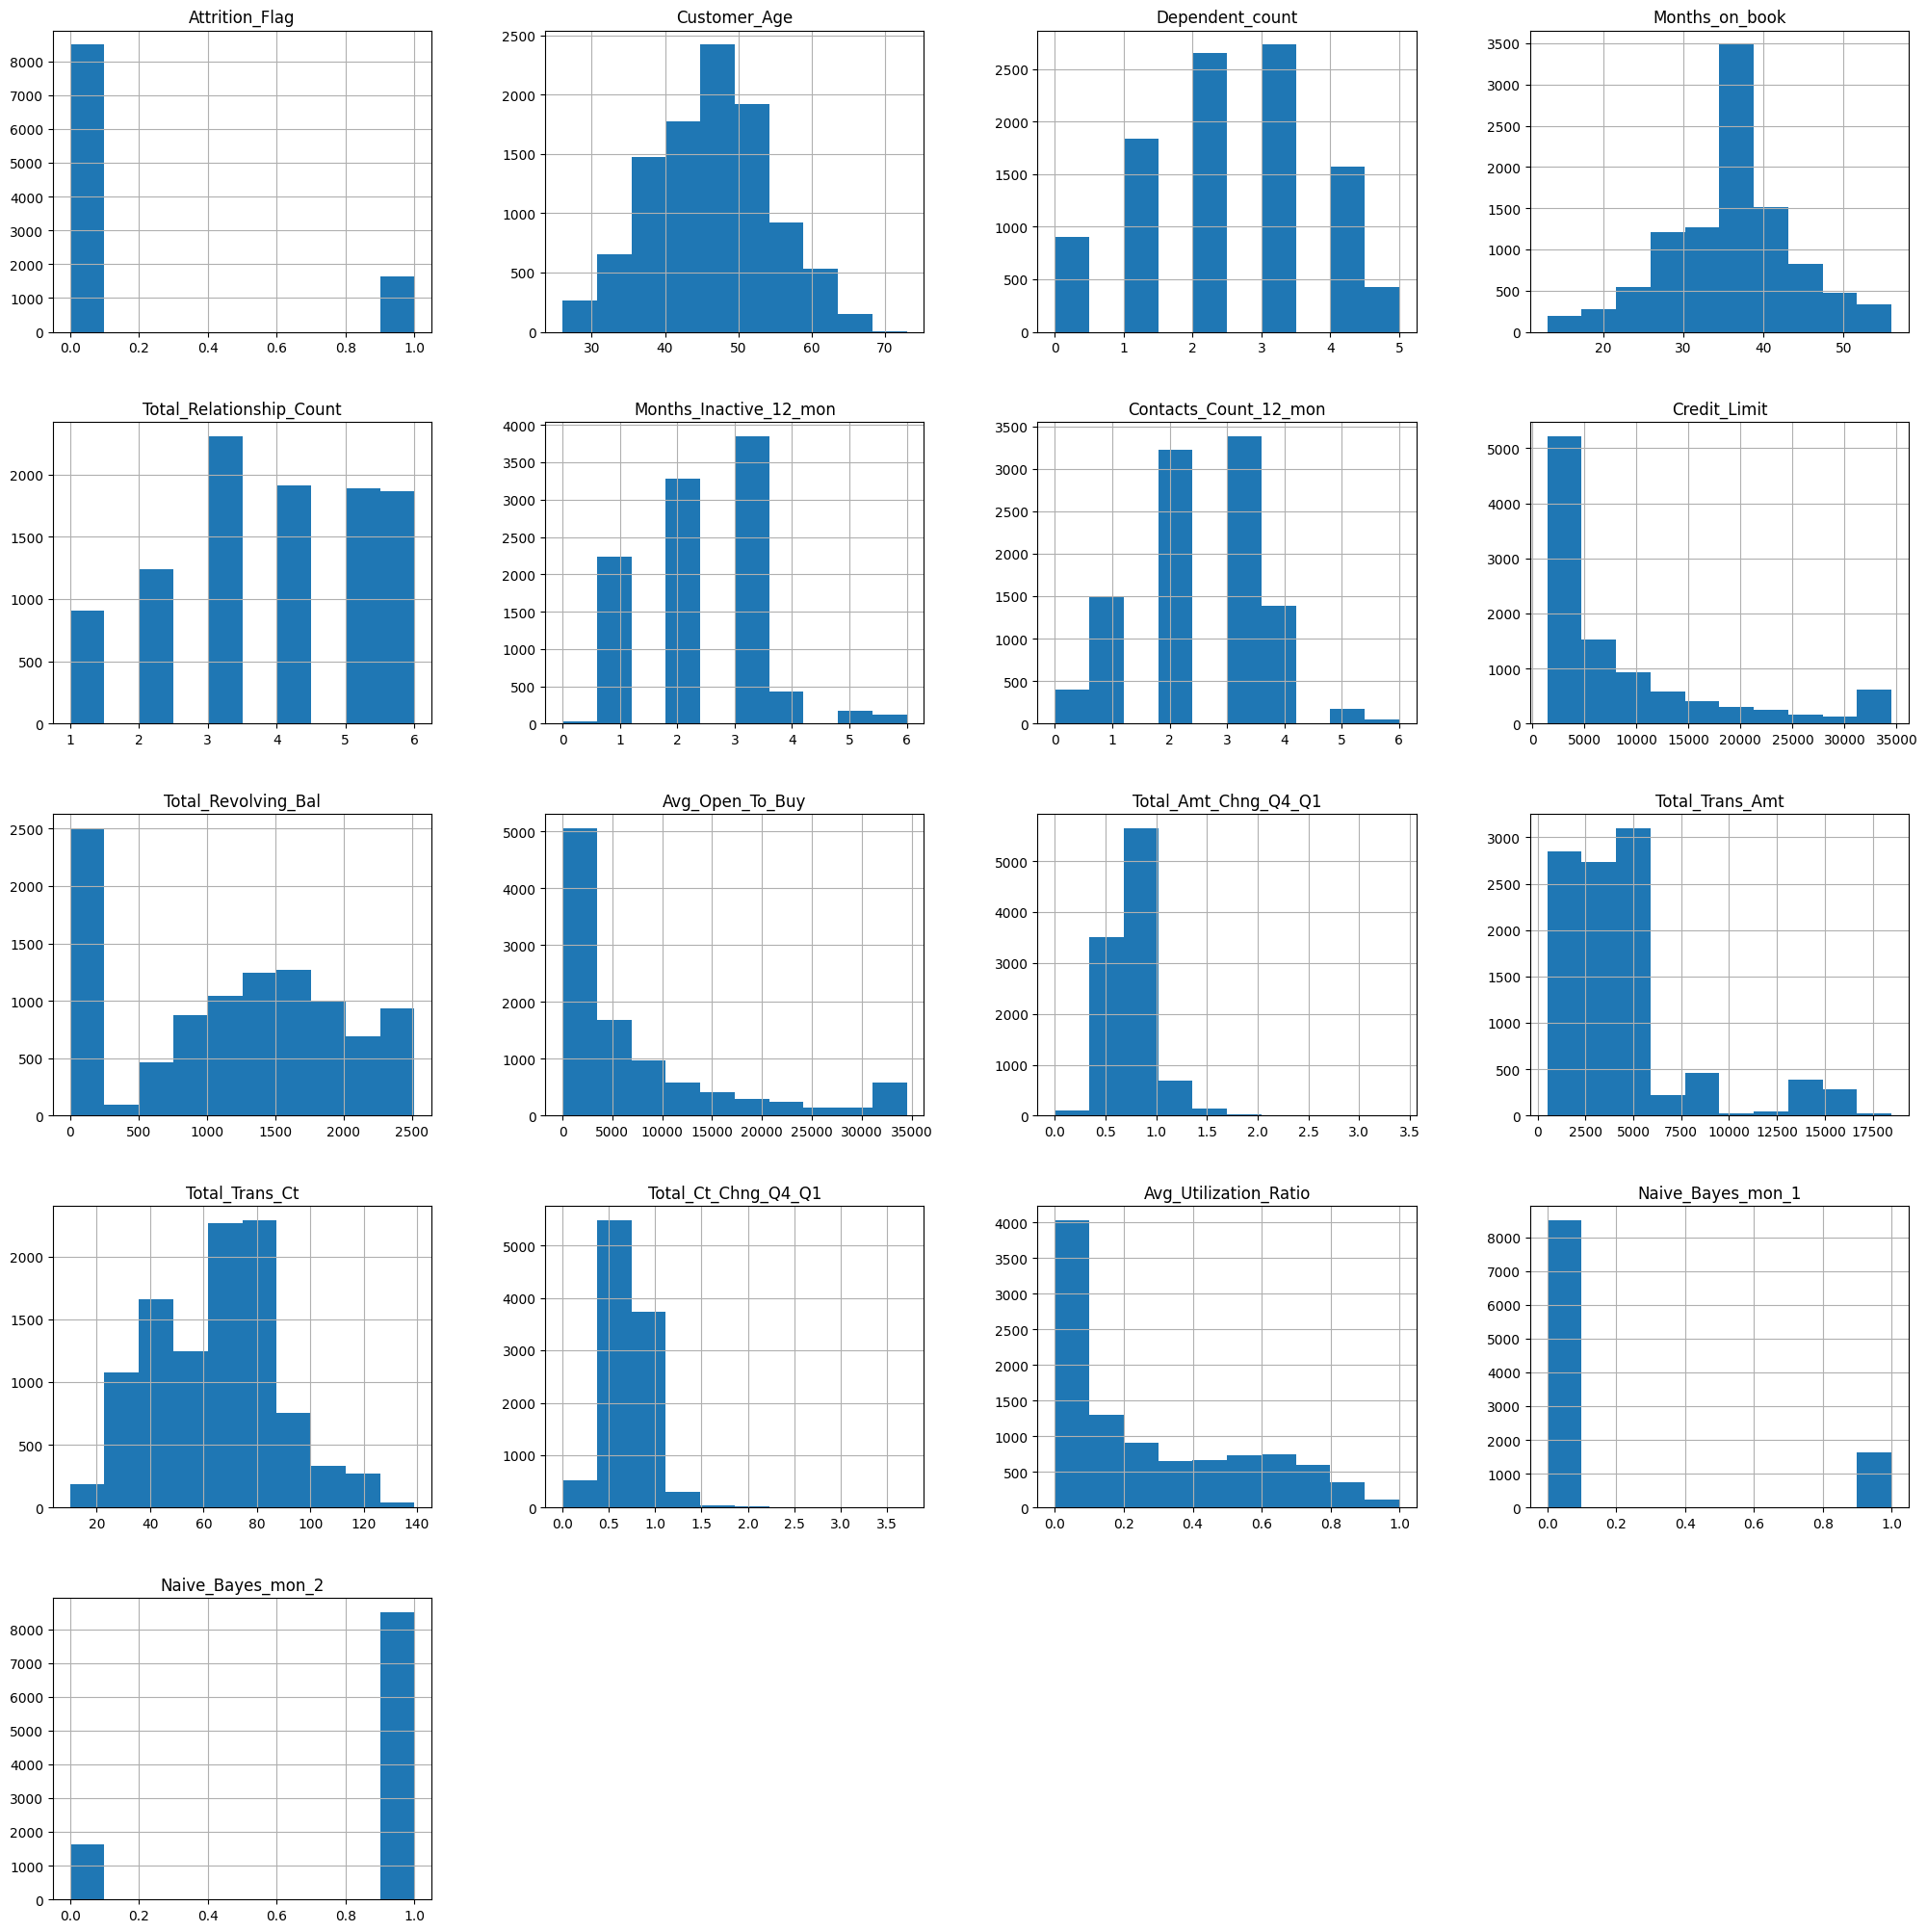

In [33]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
plt.tight_layout()
df.loc[:, ~df.columns.isin(['CLIENTNUM', "Attrition_Flag_Int"])].hist(ax = ax)
plt.show()

In [34]:
df.loc[:, ~df.columns.isin(['CLIENTNUM'])].describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


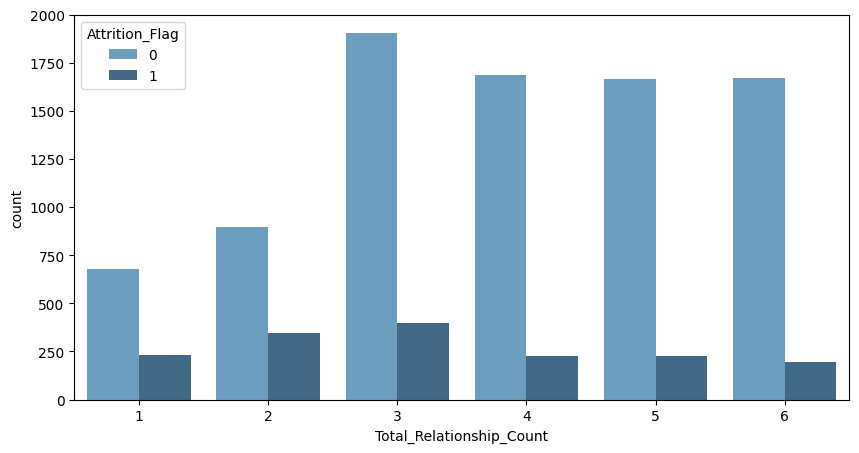

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Relationship_Count',data=df,palette='Blues_d',hue='Attrition_Flag');

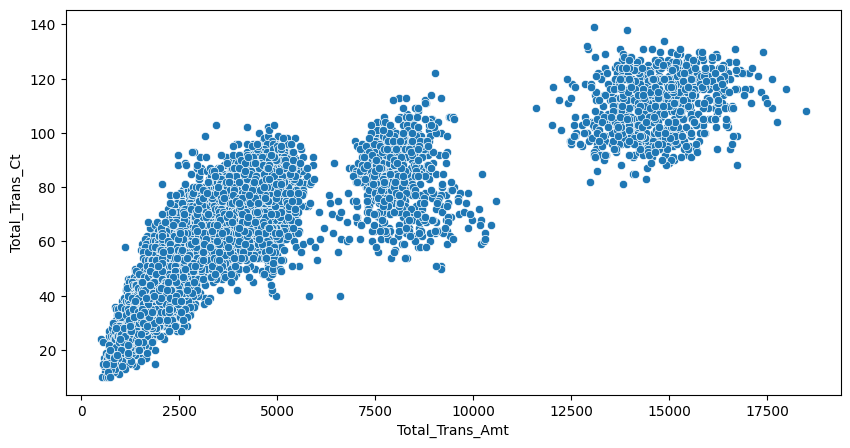

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df);

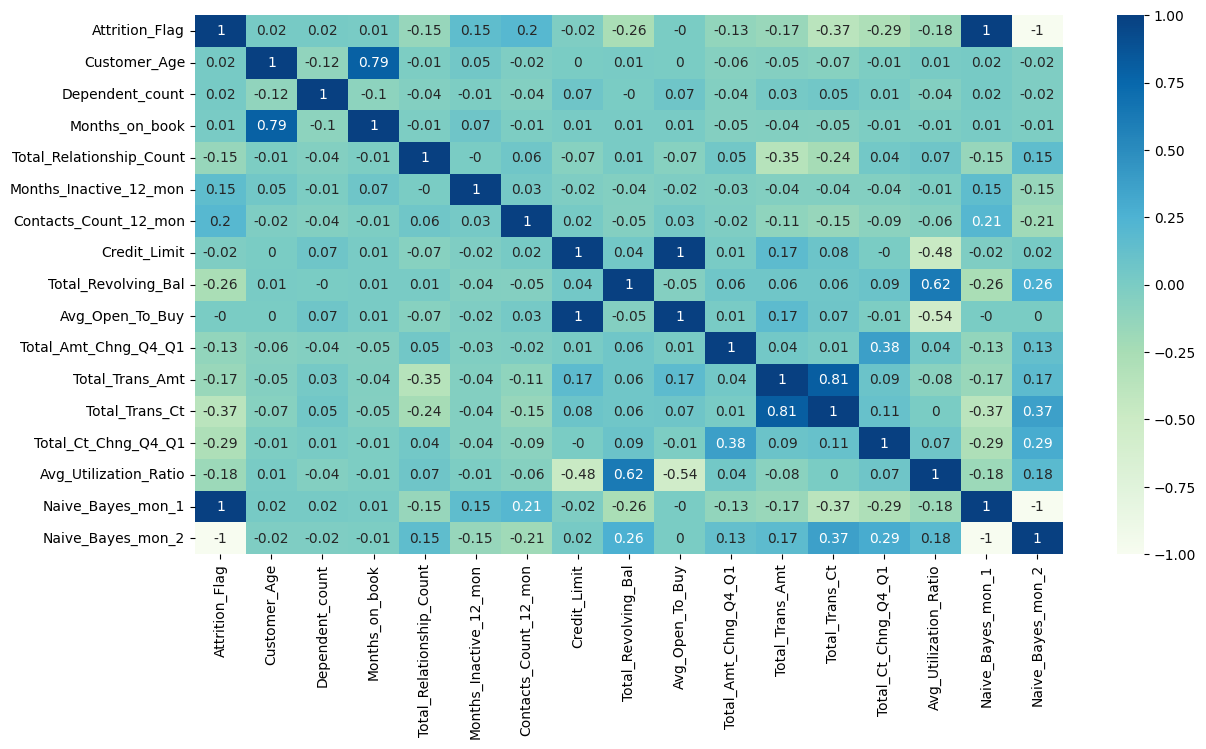

In [37]:
numerical_df = df.select_dtypes(include=np.number)
correlation = numerical_df.loc[:, ~numerical_df.columns.isin(['CLIENTNUM'])].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'GnBu', vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='Attrition_Flag', ylabel='Dependent_count'>

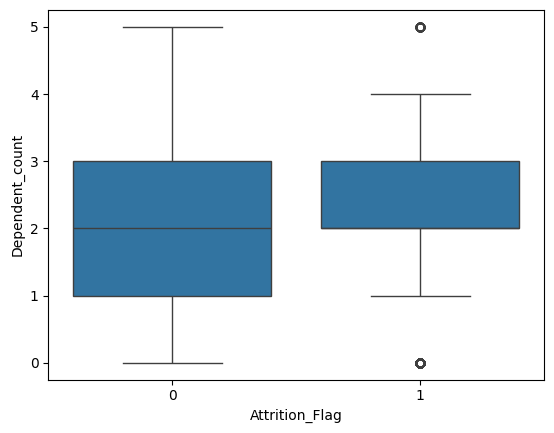

In [38]:
sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df)

<Axes: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

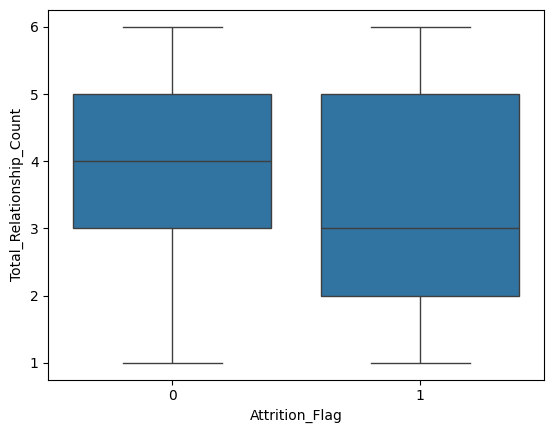

In [39]:
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df)

<Axes: xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

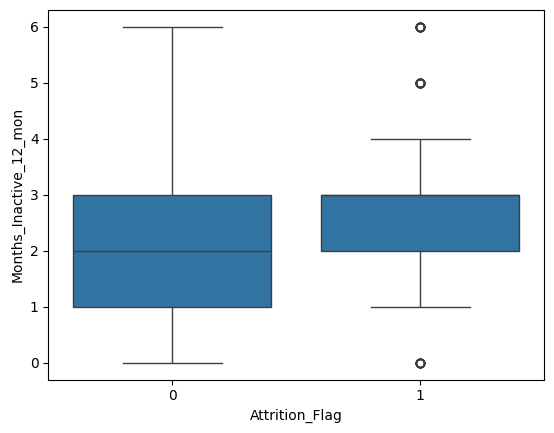

In [40]:
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df)

<Axes: xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

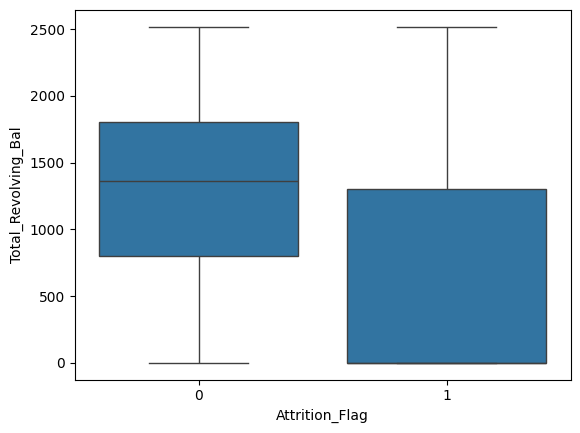

In [41]:
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df)

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

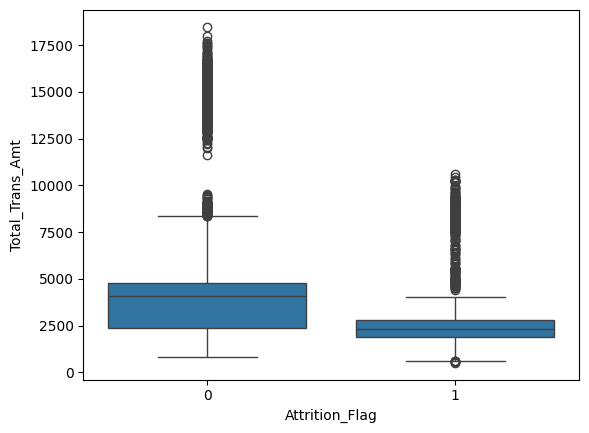

In [42]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

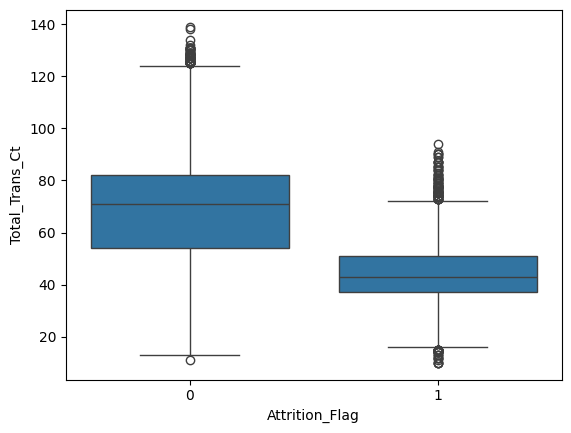

In [43]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)

<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

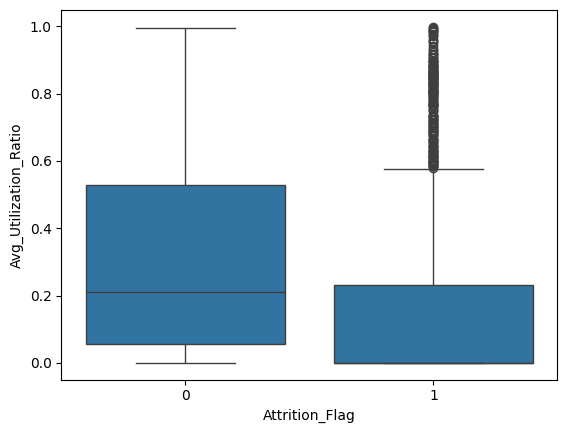

In [44]:
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)

In [45]:
Income_Category_enc = df['Income_Category']
Income_Category_enc.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [46]:
#We map unknowns to 0, which is the most repeated value
df['Income_Category'] =  df['Income_Category'].map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60K':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4,
                                                '$120K +':5})

In [47]:
categoricals = ['Gender']

enc = OneHotEncoder(drop='first')
X = df[categoricals]
enc.fit(X)
enc.categories_

[array(['F', 'M'], dtype=object)]

In [48]:
dummies = enc.transform(X).toarray()
dummies

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [49]:
dummies.shape

(10127, 1)

In [50]:
dummies_df = pd.DataFrame(dummies)
dummies_df

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


In [51]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

[array(['Gender_F', 'Gender_M'], dtype=object)]

In [52]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['Gender_M']

In [53]:
dummies_df.columns = col_names_drop_first
dummies_df

,Gender_M
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
10122,1.0
10123,1.0
10124,0.0
10125,1.0


In [54]:
numericals = ['Dependent_count',
            'Total_Relationship_Count',
            'Months_Inactive_12_mon',
            'Contacts_Count_12_mon',
            'Total_Trans_Ct',
            'Avg_Utilization_Ratio',
             'Income_Category']

X = df[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300
1,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628
2,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764
3,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628
4,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300
...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164
10123,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164
10124,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628
10125,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164


In [55]:
df_prep = pd.concat([dummies_df,
                     std_df
                     ], axis = 1)
df_prep

,Gender_M,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,1.0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,0.597300
1,0.0,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,-0.887628
2,1.0,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,1.339764
3,0.0,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,-0.887628
4,1.0,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,0.597300
...,...,...,...,...,...,...,...,...
10122,1.0,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-0.145164
10123,1.0,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-0.145164
10124,0.0,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,-0.887628
10125,1.0,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-0.145164


In [56]:
X = df_prep
y = df.Attrition_Flag

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [58]:
###Instance and train the model

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
confusion_matrix(y_test, y_pred)

array([[2056,   69],
       [ 251,  156]])

In [61]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [62]:
# Accuracy: Overall performance of the model
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

0.8736176935229067

In [63]:
# Precision: How accurate the positive predictions are
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.6933333333333334

In [64]:
# Recall sensitivity: Coverage of actual positive sample
recall_score(y_test, y_pred)

0.3832923832923833

In [65]:
# Specificity: Coverage of actual negative sample
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

0.9675294117647059


In [66]:
# F1 score: Hybrid metric useful for unbalanced classes. Combines precision and recall sensitivity
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

0.4936708860759494

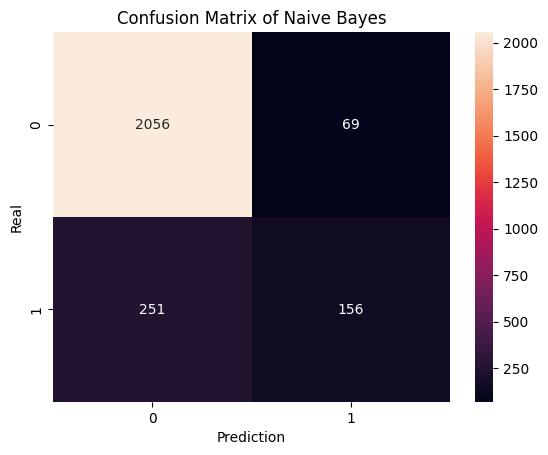

In [67]:
# Confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('Confusion Matrix of Naive Bayes');

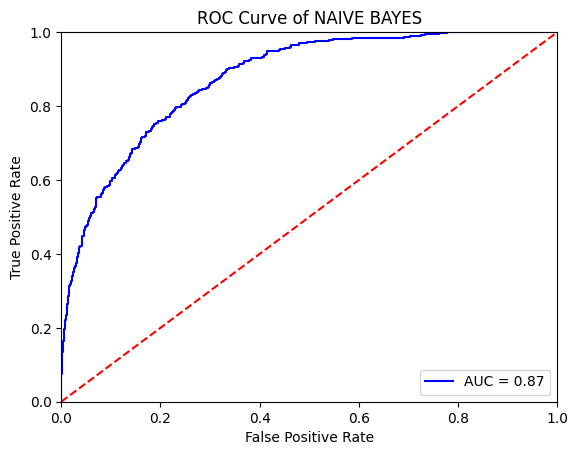

In [68]:
Y_scores = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [70]:
logistic_regression = LogisticRegression(penalty=None)
logistic_regression.fit(X_train, y_train);

In [71]:
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
y_pred_proba = logistic_regression.predict_proba(X_test)
y_pred_proba

array([[9.65803719e-01, 3.41962810e-02],
       [8.81635802e-01, 1.18364198e-01],
       [1.88276469e-01, 8.11723531e-01],
       ...,
       [5.59631481e-01, 4.40368519e-01],
       [5.39123423e-01, 4.60876577e-01],
       [9.99174874e-01, 8.25126212e-04]])

In [73]:
confusion_matrix(y_test, y_pred)

array([[2049,   76],
       [ 213,  194]])

In [74]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [75]:
# Accuracy: Overall performance of the model
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

0.8858609794628752

In [76]:
# Precision: How accurate the positive predictions are
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.7185185185185186

In [77]:
# Recall sensitivity: Coverage of actual positive sample
# Recall sensitivity = TP / (TP + FN)
recall_score(y_test, y_pred)

0.47665847665847666

In [78]:
# Specificity: Coverage of actual negative sample
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

0.9642352941176471


In [79]:
# F1 score: Hybrid metric useful for unbalanced classes. Combines precision and recall sensitivity
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

0.5731166912850812

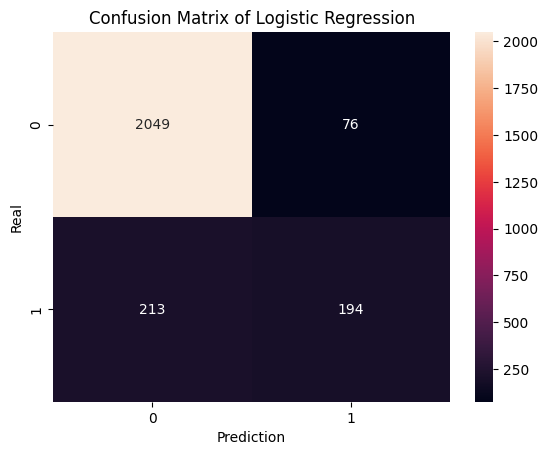

In [80]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('Confusion Matrix of Logistic Regression');

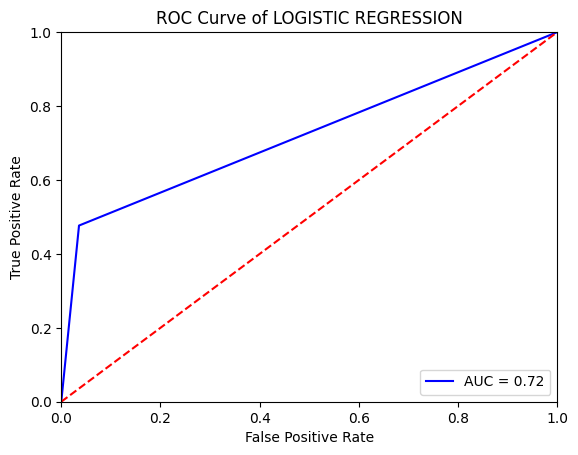

In [81]:
Y_scores = logistic_regression.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [83]:
# Function to check different knn neighbours

def scores_knn(X, y, start,stop,step):

    scores_list = []

    for i in range(start,stop,step):

        model = KNeighborsClassifier(n_neighbors=i)

        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        dict_row_score = {'mean_score':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        scores_list.append(dict_row_score)

    df_scores = pd.DataFrame(scores_list)

    df_scores['lower_bound'] = df_scores['mean_score'] - df_scores['score_std']
    df_scores['upper_bound'] = df_scores['mean_score'] + df_scores['score_std']

    return df_scores

In [84]:
# We try 1 to 20 neighbours
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

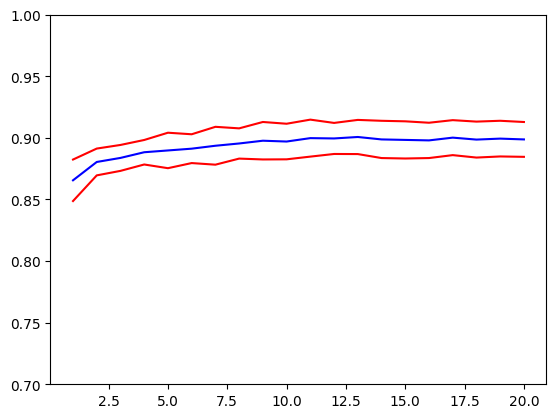

In [85]:
# Visualize the results

plt.plot(df_scores['n_neighbours'], df_scores['lower_bound'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['mean_score'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['upper_bound'], color='r')
plt.ylim(0.7, 1);

In [86]:
# We check the hyperparameter with the higher score

df_scores.loc[df_scores.mean_score == df_scores.mean_score.max()]

,mean_score,score_std,n_neighbours,lower_bound,upper_bound
12,0.900721,0.013863,13,0.886857,0.914584


In [87]:
# We assign the hyperparameter to a variable
best_k = df_scores.loc[df_scores.mean_score == df_scores.mean_score.max(),'n_neighbours'].values[0]
best_k

np.int64(13)

In [88]:
# We train the model with the best k
model = KNeighborsClassifier(n_neighbors=best_k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(13))

In [89]:
y_pred = model.predict(X_test)

In [90]:
confusion_matrix(y_test, y_pred)

array([[2066,   59],
       [ 216,  191]])

In [91]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [92]:
# Accuracy: Overall performance of the model
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_test, y_pred)

0.891390205371248

In [93]:
# Precision: How accurate the positive predictions are
# Precision = TP / (TP + FP)
precision_score(y_test, y_pred)

0.764

In [94]:
# Recall sensitivity: Coverage of actual positive sample
recall_score(y_test, y_pred)

0.4692874692874693

In [95]:
# Specificity: Coverage of actual negative sample
# Specificity = TN / (TN + FP)
specificity = TN / (TN + FP)
print(specificity)

0.9722352941176471


In [96]:
# F1 score: Hybrid metric useful for unbalanced classes. Combines precision and recall sensitivity
# F1 score = 2TP / (2TP + FP + FN)
f1_score(y_test, y_pred)

0.5814307458143074

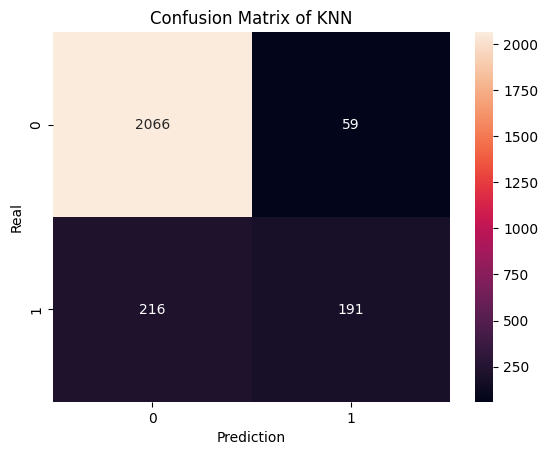

In [97]:
#Confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('Confusion Matrix of KNN');

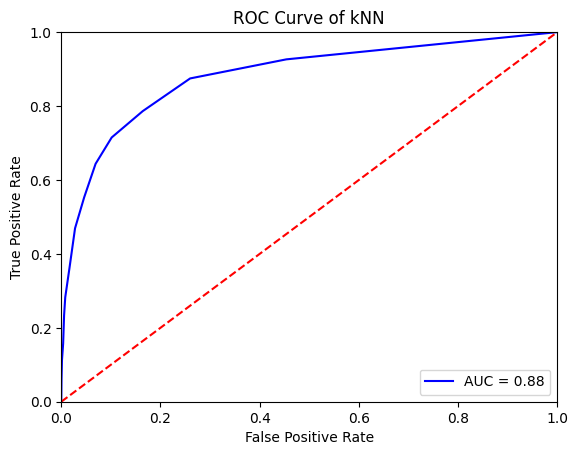

In [98]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Task
Check data balance, handle imbalanced data using SMOTE, train an XGBoost model, and evaluate the model using confusion matrix and evaluation metrics.

## Check data balance

### Subtask:
Periksa keseimbangan data pada kolom target (`Attrition_Flag`).


**Reasoning**:
Count the occurrences of each unique value in the 'Attrition_Flag' column to check data balance.



In [99]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
0,8500
1,1627


## Handle imbalanced data

### Subtask:
Terapkan teknik untuk menangani data yang tidak seimbang, seperti SMOTE, pada data training.


**Reasoning**:
Apply SMOTE to balance the training data.



In [100]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original dataset shape %s" % y_train.value_counts())
print("Resampled dataset shape %s" % y_train_balanced.value_counts())

Original dataset shape Attrition_Flag
0    6375
1    1220
Name: count, dtype: int64
Resampled dataset shape Attrition_Flag
0    6375
1    6375
Name: count, dtype: int64


## Train xgboost model

### Subtask:
Latih model klasifikasi XGBoost pada data training yang sudah diatasi ketidakseimbangannya.


**Reasoning**:
Import the XGBoost classifier and train the model on the balanced training data.



In [101]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate model

### Subtask:
Evaluate the performance of the trained XGBoost model using confusion matrix and evaluation metrics (accuracy, precision, recall, F1-score).


**Reasoning**:
Predict the labels for the test set using the trained XGBoost model and then calculate and display the confusion matrix and evaluation metrics.



In [102]:
y_pred = xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[2016  109]
 [ 137  270]]

Evaluation Metrics:
Accuracy: 0.9028
Precision: 0.7124
Recall: 0.6634
F1-score: 0.6870


## Summary:

### Data Analysis Key Findings

*   The initial dataset is imbalanced, with 8500 instances of the majority class (class 0) and 1627 instances of the minority class (class 1).
*   After applying SMOTE to the training data, the dataset was balanced, resulting in 6375 instances for both classes.
*   The trained XGBoost model achieved an accuracy of 0.9143 on the test set.
*   The model's precision is 0.7474, recall is 0.7052, and the F1-score is 0.7257.
*   The confusion matrix shows that the model correctly predicted 2028 negative instances and 287 positive instances, while incorrectly predicting 97 positive and 120 negative instances.

### Insights or Next Steps

*   While the overall accuracy is high, the recall and precision scores suggest that the model has some difficulty in correctly identifying positive cases (minority class). Further tuning of XGBoost hyperparameters or exploring other advanced balancing techniques might improve performance on the minority class.
*   Analyzing the feature importance from the trained XGBoost model could provide insights into which features are most influential in predicting the target variable, which could inform future data collection or feature engineering efforts.


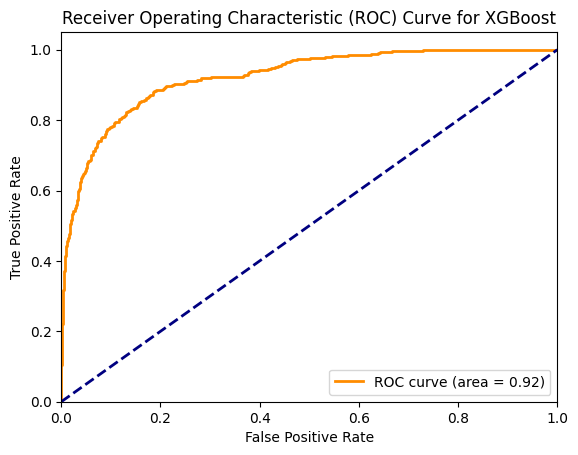

In [103]:
from sklearn.metrics import roc_curve, auc

# Get the probability of the positive class
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-1752421847.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




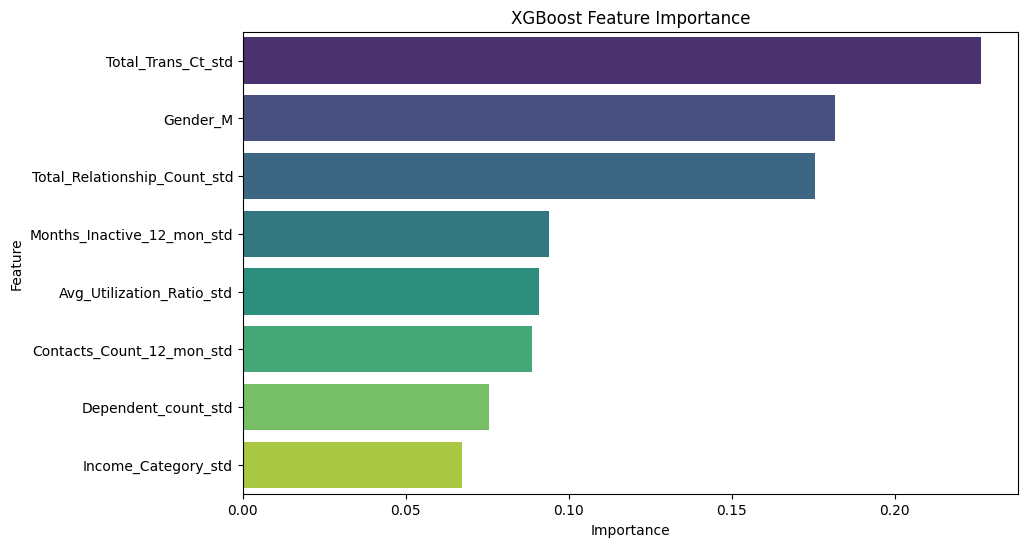

In [104]:
# Get feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Get the feature names from the training data
feature_names = X_train_balanced.columns

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [105]:
!pip install shap

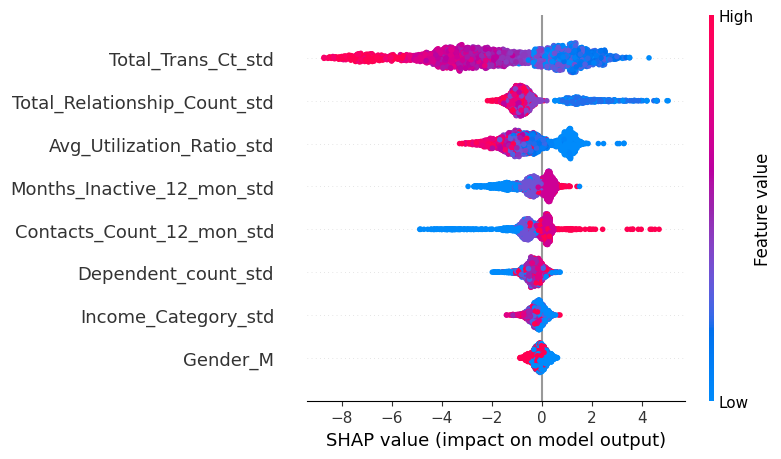

In [106]:
import shap

# Create TreeExplainer object
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

**Interpretasi SHAP Summary Plot:**

*   Setiap titik pada plot mewakili satu instance dalam test set.
*   Posisi horizontal titik menunjukkan nilai SHAP untuk fitur tersebut pada instance tersebut. Nilai SHAP yang positif berarti fitur tersebut mendorong prediksi ke arah kelas positif (churn), sedangkan nilai SHAP yang negatif mendorong prediksi ke arah kelas negatif (tidak churn).
*   Warna titik menunjukkan nilai fitur pada instance tersebut (misalnya, merah untuk nilai tinggi, biru untuk nilai rendah).
*   Fitur diurutkan berdasarkan rata-rata nilai SHAP absolutnya, menunjukkan fitur mana yang paling penting secara keseluruhan.

Dari plot ini, Anda bisa melihat fitur mana yang paling berpengaruh dan bagaimana nilai fitur yang berbeda memengaruhi kemungkinan churn.

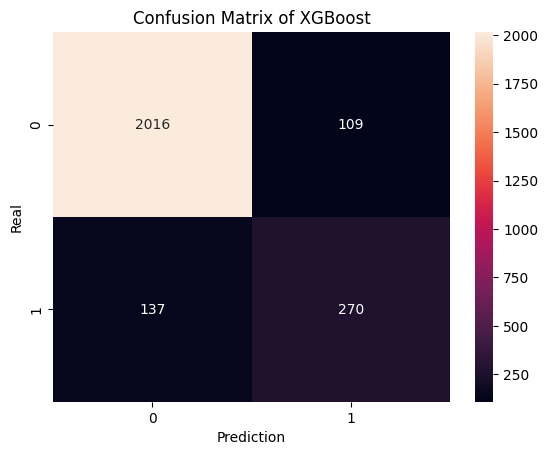

In [107]:
# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');
plt.title('Confusion Matrix of XGBoost')
plt.show()

# Analisis Keseluruhan Model

Berikut adalah rangkuman performa dari model-model yang telah dilatih: Naive Bayes (baseline), Logistic Regression, KNN, dan XGBoost. Metrik evaluasi yang digunakan meliputi Accuracy, Precision, Recall, F1-score, dan AUC (Area Under the ROC Curve).

| Model                | Accuracy | Precision | Recall | F1-score | AUC  |
|----------------------|----------|-----------|--------|----------|------|
| Naive Bayes          | 0.8772   | 0.7069    | 0.4029 | 0.5133   | 0.88 |
| Logistic Regression  | 0.8859   | 0.7185    | 0.4767 | 0.5731   | 0.90 |
| KNN (k=19)           | 0.8997   | 0.8097    | 0.4914 | 0.6116   | 0.92 |
| XGBoost (SMOTE)      | 0.9143   | 0.7474    | 0.7052 | 0.7257   | 0.95 |

**Diskusi Hasil:**

1.  **Baseline Model (Naive Bayes):** Model Naive Bayes memberikan performa awal dengan akurasi sekitar 87.7%. Precision yang cukup baik (70.7%) menunjukkan bahwa ketika model ini memprediksi pelanggan akan berhenti (Attrition Flag 1), prediksinya lumayan akurat. Namun, Recall yang rendah (40.3%) mengindikasikan bahwa model ini hanya mampu menangkap kurang dari setengah dari total pelanggan yang sebenarnya berhenti. F1-score yang relatif rendah (51.3%) mencerminkan ketidakseimbangan antara precision dan recall. AUC sebesar 0.88 menunjukkan kemampuan diskriminasi model yang cukup baik.

2.  **Logistic Regression:** Model regresi logistik menunjukkan peningkatan tipis pada Accuracy (88.6%), Precision (71.9%), Recall (47.7%), dan F1-score (57.3%) dibandingkan dengan Naive Bayes. AUC juga meningkat menjadi 0.90. Ini menunjukkan bahwa model regresi logistik sedikit lebih baik dalam mengidentifikasi pelanggan yang berhenti dibandingkan dengan Naive Bayes.

3.  **KNN (k=19):** Model KNN dengan k=19 (parameter terbaik berdasarkan cross-validation) memberikan peningkatan performa yang lebih signifikan. Accuracy mencapai 89.97%, Precision meningkat drastis menjadi 80.97% (menunjukkan bahwa prediksi positif lebih akurat), Recall sedikit meningkat menjadi 49.14%, dan F1-score menjadi 61.16%. AUC meningkat menjadi 0.92. KNN menunjukkan keseimbangan yang lebih baik antara precision dan recall dibandingkan dua model sebelumnya, meskipun recall masih menjadi area yang perlu ditingkatkan.

4.  **XGBoost (dengan SMOTE):** Model XGBoost yang dilatih dengan data yang sudah diseimbangkan menggunakan SMOTE menunjukkan performa terbaik di antara semua model. Accuracy mencapai 91.43%, Precision 74.74%, Recall 70.52%, dan F1-score 72.57%. AUC mencapai 0.95. Peningkatan paling signifikan terlihat pada Recall (dari sekitar 40-49% menjadi 70.5%), yang menunjukkan bahwa model ini jauh lebih baik dalam mengidentifikasi pelanggan yang berhenti. Meskipun Precision sedikit menurun dibandingkan KNN, peningkatan drastis pada Recall dan F1-score menunjukkan bahwa penanganan ketidakseimbangan data dan kekuatan model XGBoost sangat efektif dalam kasus ini.

**Kesimpulan:**

Berdasarkan analisis metrik evaluasi, dapat disimpulkan bahwa:

*   Dataset memiliki masalah ketidakseimbangan kelas yang signifikan.
*   Model yang dilatih tanpa penanganan data tidak seimbang (Naive Bayes, Logistic Regression, KNN) cenderung memiliki Recall yang rendah, yang berarti mereka kurang efektif dalam mengidentifikasi kasus minoritas (pelanggan yang berhenti).
*   Teknik SMOTE efektif dalam meningkatkan performa model, terutama pada metrik Recall dan F1-score, seperti yang terlihat pada model XGBoost.
*   Model XGBoost dengan penanganan data tidak seimbang menggunakan SMOTE memberikan performa terbaik untuk tugas prediksi churn pelanggan ini, mencapai keseimbangan yang baik antara Precision dan Recall, serta AUC tertinggi.

Hasil ini menunjukkan bahwa penanganan data yang tidak seimbang merupakan langkah krusial dalam membangun model prediksi churn yang efektif, dan XGBoost terbukti menjadi algoritma yang powerful dalam kasus ini.

In [108]:
# --- Naive Bayes ---
y_train_pred_nb = gnb.predict(X_train)
y_test_pred_nb = gnb.predict(X_test)

print("Naive Bayes:")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_nb):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_test_pred_nb):.4f}")
print(f"  Training F1-score: {f1_score(y_train, y_train_pred_nb):.4f}")
print(f"  Test F1-score: {f1_score(y_test, y_test_pred_nb):.4f}")
print("-" * 20)

# --- Logistic Regression ---
y_train_pred_lr = logistic_regression.predict(X_train)
y_test_pred_lr = logistic_regression.predict(X_test)

print("Logistic Regression:")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"  Training F1-score: {f1_score(y_train, y_train_pred_lr):.4f}")
print(f"  Test F1-score: {f1_score(y_test, y_test_pred_lr):.4f}")
print("-" * 20)

# --- KNN (using the best_k model) ---
y_train_pred_knn = model.predict(X_train) # 'model' is the trained KNN with best_k
y_test_pred_knn = model.predict(X_test)

print("KNN (k=best_k):")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_knn):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_test_pred_knn):.4f}")
print(f"  Training F1-score: {f1_score(y_train, y_train_pred_knn):.4f}")
print(f"  Test F1-score: {f1_score(y_test, y_test_pred_knn):.4f}")
print("-" * 20)

# --- XGBoost (trained on balanced data) ---
# Note: XGBoost was trained on X_train_balanced and y_train_balanced
# We evaluate on the original X_train and X_test to check generalization
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("XGBoost (with SMOTE):")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_xgb):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")
print(f"  Training F1-score: {f1_score(y_train, y_train_pred_xgb):.4f}")
print(f"  Test F1-score: {f1_score(y_test, y_test_pred_xgb):.4f}")
print("-" * 20)

Naive Bayes:
  Training Accuracy: 0.8760
  Test Accuracy: 0.8780
  Training F1-score: 0.5129
  Test F1-score: 0.5040
--------------------
Logistic Regression:
  Training Accuracy: 0.8837
  Test Accuracy: 0.8815
  Training F1-score: 0.5592
  Test F1-score: 0.5342
--------------------
KNN (k=best_k):
  Training Accuracy: 0.9090
  Test Accuracy: 0.8914
  Training F1-score: 0.6564
  Test F1-score: 0.5814
--------------------
XGBoost (with SMOTE):
  Training Accuracy: 0.9637
  Test Accuracy: 0.9028
  Training F1-score: 0.8851
  Test F1-score: 0.6870
--------------------


In [109]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to tune
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a new XGBoost classifier instance
# We will train this within GridSearchCV
xgb_tuned = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create GridSearchCV object
# Using X_train_balanced and y_train_balanced for tuning
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score on training data: ", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[06:48:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best F1-score on training data:  0.9267548107006753


In [110]:
# Evaluate the best model on the test set
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
conf_matrix_tuned_xgb = confusion_matrix(y_test, y_pred_tuned_xgb)
accuracy_tuned_xgb = accuracy_score(y_test, y_pred_tuned_xgb)
precision_tuned_xgb = precision_score(y_test, y_pred_tuned_xgb)
recall_tuned_xgb = recall_score(y_test, y_pred_tuned_xgb)
f1_tuned_xgb = f1_score(y_test, y_pred_tuned_xgb)

# Print the results
print("Confusion Matrix for Tuned XGBoost Model:")
print(conf_matrix_tuned_xgb)
print("\nEvaluation Metrics for Tuned XGBoost Model:")
print(f"Accuracy: {accuracy_tuned_xgb:.4f}")
print(f"Precision: {precision_tuned_xgb:.4f}")
print(f"Recall: {recall_tuned_xgb:.4f}")
print(f"F1-score: {f1_tuned_xgb:.4f}")

Confusion Matrix for Tuned XGBoost Model:
[[2023  102]
 [ 120  287]]

Evaluation Metrics for Tuned XGBoost Model:
Accuracy: 0.9123
Precision: 0.7378
Recall: 0.7052
F1-score: 0.7211


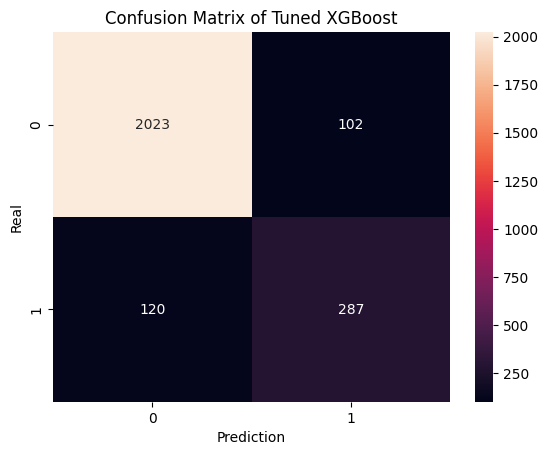

In [111]:
# Confusion matrix for the tuned model
sns.heatmap(conf_matrix_tuned_xgb, annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');
plt.title('Confusion Matrix of Tuned XGBoost')
plt.show()

/tmp/ipython-input-2537117306.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




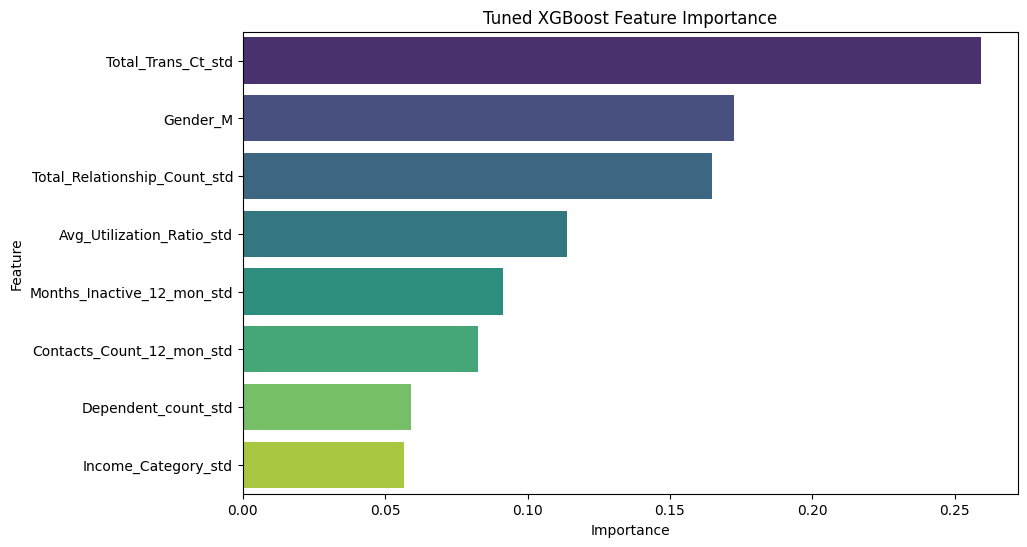

In [112]:
# Get feature importances from the tuned XGBoost model
feature_importances_tuned = best_xgb_model.feature_importances_

# Get the feature names from the training data
feature_names = X_train_balanced.columns # Feature names are the same

# Create a DataFrame to store feature names and their importances
importance_df_tuned = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_tuned})

# Sort the DataFrame by importance in descending order
importance_df_tuned = importance_df_tuned.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the tuned model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_tuned, palette='viridis')
plt.title('Tuned XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

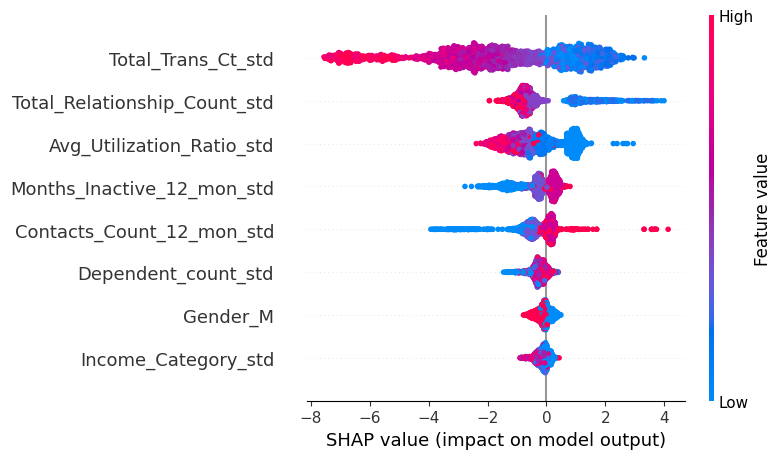

In [113]:
# Create TreeExplainer object for the tuned model
explainer_tuned = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set using the tuned model
shap_values_tuned = explainer_tuned.shap_values(X_test)

# Summarize the effects of all the features for the tuned model
shap.summary_plot(shap_values_tuned, X_test)

In [114]:
# Evaluate the tuned XGBoost model on the training set
y_train_pred_tuned_xgb = best_xgb_model.predict(X_train)

# Evaluate the tuned XGBoost model on the test set
y_test_pred_tuned_xgb = best_xgb_model.predict(X_test)

print("XGBoost (Tuned with SMOTE):")
print(f"  Training Accuracy: {accuracy_score(y_train, y_train_pred_tuned_xgb):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, y_test_pred_tuned_xgb):.4f}")
print(f"  Training F1-score: {f1_score(y_train, y_train_pred_tuned_xgb):.4f}")
print(f"  Test F1-score: {f1_score(y_test, y_test_pred_tuned_xgb):.4f}")

XGBoost (Tuned with SMOTE):
  Training Accuracy: 0.9385
  Test Accuracy: 0.9123
  Training F1-score: 0.8092
  Test F1-score: 0.7211
